In [5]:
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt

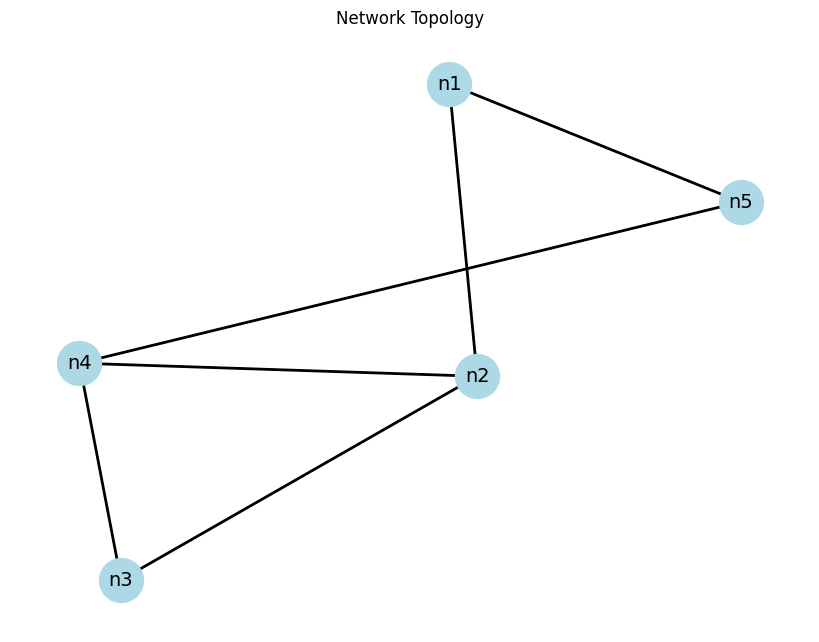

In [10]:
# Create Graph
G = nx.Graph()
nodes = ["n1", "n2", "n3", "n4", "n5"]
edges = [("n1", "n2"), ("n2", "n3"), ("n3", "n4"),
         ("n4", "n5"), ("n2", "n4"), ("n1", "n5")]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Visualize Topology
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=14)
nx.draw_networkx_edges(G, pos, width=2)
plt.title("Network Topology")
plt.show()


In [11]:
slices = {
    "S1": {"type": "eMBB", "latency_ms": 50, "throughput_mbps": 100},
    "S2": {"type": "URLLC", "latency_ms": 10, "throughput_mbps": 10},
    "S3": {"type": "mMTC", "latency_ms": 500, "throughput_mbps": 0.1}
}

In [12]:
vnf_energy_per_instance = 10
node_energy_active = 100

vnf_counts = {}
routes = {}
vnf_assignments = []
total_energy = 0

for s in slices:
    vnfs = random.choice([1, 2, 3, 4, 5, 6, 7])
    vnf_counts[s] = vnfs
    origin, dest = random.sample(nodes, 2)
    path = nx.shortest_path(G, source=origin, target=dest)
    routes[s] = path
    total_energy += vnfs * vnf_energy_per_instance
    for i in range(vnfs):
        assigned_node = random.choice(path)
        vnf_assignments.append((s, f"VNF{i+1}", assigned_node))


In [13]:
active_nodes = set(n for _, _, n in vnf_assignments)
total_energy += len(active_nodes) * node_energy_active

# Criar tabela
df = pd.DataFrame([
    {
        "Slice": s,
        "Service Type": slices[s]["type"],
        "Latency (ms)": slices[s]["latency_ms"],
        "Throughput (Mbps)": slices[s]["throughput_mbps"],
        "Number of VNFs": vnf_counts[s],
        "Path": " → ".join(routes[s])
    }
    for s in slices
])

display(df)
print("Total energy consumed:", total_energy)
print("Active nodes:", sorted(active_nodes))


,Slice,Service Type,Latency (ms),Throughput (Mbps),Number of VNFs,Path
0,S1,eMBB,50,100.0,6,n3 → n4 → n5
1,S2,URLLC,10,10.0,6,n1 → n2
2,S3,mMTC,500,0.1,4,n5 → n4


Total energy consumed: 660
Active nodes: ['n1', 'n2', 'n3', 'n4', 'n5']
